In [181]:
import pandas as pd 
import numpy as np 
from pandas import Series,DataFrame

data_train = pd.read_csv("train.csv")
data_train.head()
data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Figure size 432x288 with 0 Axes>

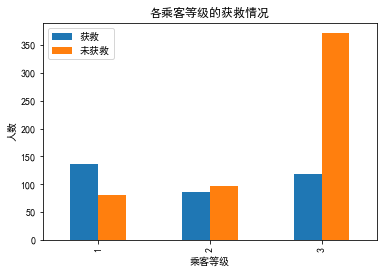

In [182]:
import matplotlib.pyplot as plt
#Pclass的影响
fig = plt.figure()

Survived_0 = data_train.Pclass[data_train.Survived == 0].value_counts()
Survived_1 = data_train.Pclass[data_train.Survived == 1].value_counts()
df=pd.DataFrame({u'获救':Survived_1, u'未获救':Survived_0})
df.plot(kind='bar')
plt.title(u"各乘客等级的获救情况")
plt.xlabel(u"乘客等级") 
plt.ylabel(u"人数") 

plt.show()


In [183]:
#看看名字有哪些称谓
titles = set()
for name in data_train['Name']:
    titles.add(name.split(',')[1].split('.')[0].strip())
print(titles)

{'Dr', 'Major', 'Sir', 'Ms', 'Mme', 'Don', 'Mr', 'Capt', 'the Countess', 'Jonkheer', 'Mrs', 'Mlle', 'Lady', 'Miss', 'Col', 'Master', 'Rev'}


In [184]:
Title_Dictionary = {
    "Capt": "Officer",
    "Col": "Officer",
    "Major": "Officer",
    "Jonkheer": "Royalty",
    "Don": "Royalty",
    "Sir" : "Royalty",
    "Dr": "Officer",
    "Rev": "Officer",
    "the Countess":"Royalty",
    "Mme": "Mrs",
    "Mlle": "Miss",
    "Ms": "Mrs",
    "Mr" : "Mr",
    "Mrs" : "Mrs",
    "Miss" : "Miss",
    "Master" : "Master",
    "Lady" : "Royalty"
}

data_train['Title']=data_train['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip()) #传入一个名字转成称谓
data_train['Title']=data_train.Title.map(Title_Dictionary)#称谓映射成地位


<Figure size 432x288 with 0 Axes>

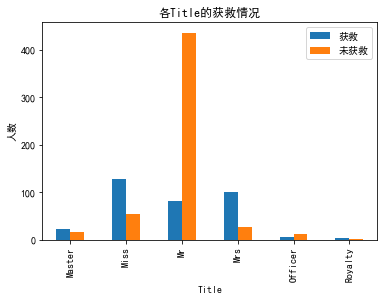

In [185]:
#看看Title对生存的影响
fig = plt.figure()

Survived_0 = data_train.Title[data_train.Survived == 0].value_counts()
Survived_1 = data_train.Title[data_train.Survived == 1].value_counts()
df=pd.DataFrame({u'获救':Survived_1, u'未获救':Survived_0})
df.plot(kind='bar')
plt.title(u"各Title的获救情况")
plt.xlabel(u"Title") 
plt.ylabel(u"人数") 

plt.show()


<Figure size 432x288 with 0 Axes>

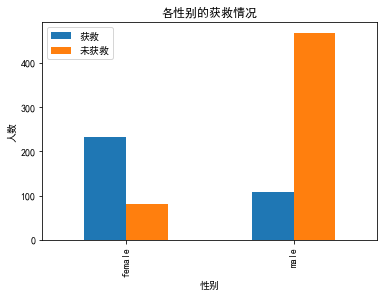

In [186]:
#看看性别对生存影响
fig = plt.figure()

Survived_0 = data_train.Sex[data_train.Survived == 0].value_counts()
Survived_1 = data_train.Sex[data_train.Survived == 1].value_counts()
df=pd.DataFrame({u'获救':Survived_1, u'未获救':Survived_0})
df.plot(kind='bar')
plt.title(u"各性别的获救情况")
plt.xlabel(u"性别") 
plt.ylabel(u"人数") 

plt.show()


<Figure size 432x288 with 0 Axes>

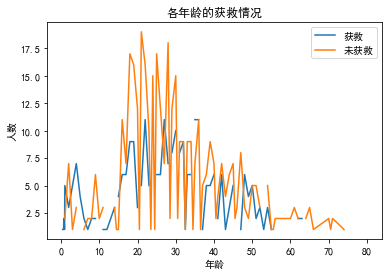

<Figure size 432x288 with 0 Axes>

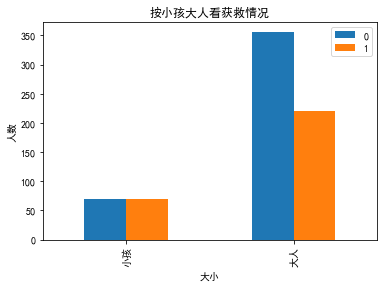

In [187]:
#看年龄对生存影响

fig = plt.figure()

Survived_0 = data_train.Age[data_train.Survived == 0].value_counts()
Survived_1 = data_train.Age[data_train.Survived == 1].value_counts()
df=pd.DataFrame({u'获救':Survived_1, u'未获救':Survived_0})
df.plot(kind='line')
plt.title(u"各年龄的获救情况")
plt.xlabel(u"年龄") 
plt.ylabel(u"人数") 

plt.show()

fig = plt.figure()

Survived_y = data_train.Survived[data_train.Age <= 18].value_counts()
Survived_o = data_train.Survived[data_train.Age > 18].value_counts()
df=pd.DataFrame({u'小孩':Survived_y, u'大人':Survived_o})
(df.T).plot(kind='bar')
plt.title(u"按小孩大人看获救情况")
plt.xlabel(u"大小") 
plt.ylabel(u"人数")
plt.show()


<Figure size 432x288 with 0 Axes>

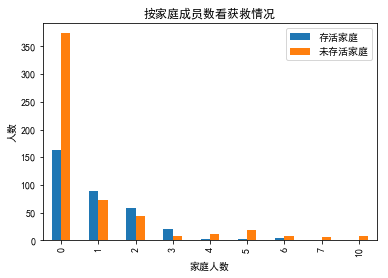

In [188]:
data_train['FamilySize']=data_train[['Parch','SibSp']].sum(axis=1)

fig=plt.figure()

Survived_F=data_train.FamilySize[data_train.Survived==1].value_counts()
Unsurvived_F=data_train.FamilySize[data_train.Survived==0].value_counts()
df=df=pd.DataFrame({u'存活家庭':Survived_F, u'未存活家庭':Unsurvived_F})
(df).plot(kind='bar')
plt.title(u"按家庭成员数看获救情况")
plt.xlabel(u"家庭人数") 
plt.ylabel(u"人数")
plt.show()

<Figure size 432x288 with 0 Axes>

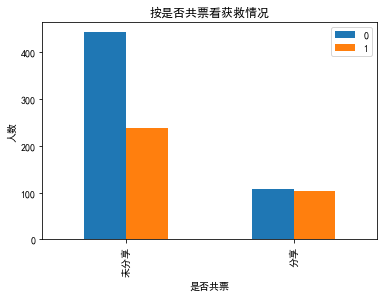

In [189]:
#看看Ticket是否重复对生存的影响
fig = plt.figure()

Survived_u = data_train.Survived[~data_train['Ticket'].duplicated()].value_counts()
Survived_d = data_train.Survived[data_train['Ticket'].duplicated()].value_counts()
df=pd.DataFrame({u'未分享':Survived_u, u'分享':Survived_d})
(df.T).plot(kind='bar')
plt.title(u"按是否共票看获救情况")
plt.xlabel(u"是否共票") 
plt.ylabel(u"人数")
plt.show()

<Figure size 432x288 with 0 Axes>

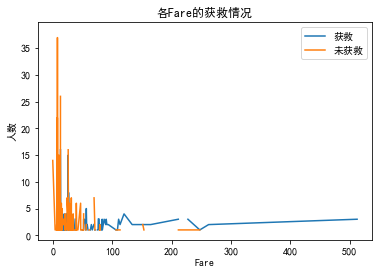

In [190]:
#Fare对生存影响
fig = plt.figure()

Survived_0 = data_train.Fare[data_train.Survived == 0].value_counts()
Survived_1 = data_train.Fare[data_train.Survived == 1].value_counts()
df=pd.DataFrame({u'获救':Survived_1, u'未获救':Survived_0})
df.plot(kind='line')
plt.title(u"各Fare的获救情况")
plt.xlabel(u"Fare") 
plt.ylabel(u"人数") 

plt.show()

In [191]:
#处理Cabin
data_train.Cabin.fillna('U',inplace=True)
data_train['Cabin'] = data_train['Cabin'].map(lambda c: c[0])
cabin_dummies = pd.get_dummies(data_train['Cabin'], prefix='Cabin')
data_train = pd.concat([data_train, cabin_dummies], axis=1)



In [197]:
#处理年龄
grouped_train = data_train.iloc[:891].groupby(['Sex','Pclass','Title'])
grouped_median_train = grouped_train.median()
grouped_median_train = grouped_median_train.reset_index()[['Sex', 'Pclass', 'Title', 'Age']]
grouped_median_train

def fill_age(row):
    condition = (
        (grouped_median_train['Sex'] == row['Sex']) & 
        (grouped_median_train['Title'] == row['Title']) & 
        (grouped_median_train['Pclass'] == row['Pclass'])
    )
    return grouped_median_train[condition]['Age'].values[0]

data_train['Age'] = data_train.apply(lambda row: fill_age(row) if np.isnan(row['Age']) else row['Age'], axis=1)
   
data_train.keys()


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Title', 'FamilySize',
       'Cabin_A', 'Cabin_B', 'Cabin_C', 'Cabin_D', 'Cabin_E', 'Cabin_F',
       'Cabin_G', 'Cabin_T', 'Cabin_U'],
      dtype='object')

In [ ]:
#处理Title
